# <font color = Purple> Analysis ideas? </font>

## What genres are popular each year?
## What's the most viewed?
## What's the highest rated anime?
## How can we compansate for multiple seasons? 
## How much anime have individual people watched? What's the average score of anime of each user
## Look at the number of Scores given to each anime

### importing stuff

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import t, norm, f

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import zipfile as zp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

importing csv file into dataframe, making NA values

In [2]:
#importing data, looking for NA Values, counting rows/columns 
missing_val = ['Unknown']
anime = pd.read_csv('anime.csv', na_values=missing_val)
anime.shape

(17562, 35)

In [3]:
#only drop the Row if the Column Score contains the word 'Unknown' 
#insert 'subset=['Score']' to .dropna() to drop only certain rows that meet column condition
anime = anime.dropna(subset=['Score'])
anime = anime.reset_index(drop=True)
anime.shape

(12421, 35)

In [4]:
#anime.columns
#anime.dtypes

finding the genres

In [5]:
#check how many genres are there
temp = anime['Genres']
genres = {}
for row in anime['Genres']:
    list_1 = str(row).split(',')
    stuff = []
    for thing in list_1:
        stuff.append(thing.strip())
    for genre in stuff:
        if genre in genres:
            genres[genre] += 1
        else:
            genres[genre] = 1
genres = sorted(genres.items(), key=lambda x: x[1], reverse=True)
genres[:10]

[('Comedy', 4559),
 ('Action', 3312),
 ('Fantasy', 2452),
 ('Adventure', 2288),
 ('Sci-Fi', 2185),
 ('Drama', 2051),
 ('Shounen', 1796),
 ('Romance', 1724),
 ('School', 1433),
 ('Slice of Life', 1370)]

testing how to search for specific genres

In [6]:
anime = anime.dropna(subset=['Genres'])
anime = anime.reset_index()

comedy = anime.loc[anime['Genres'].str.contains('Comedy')]
comedy.shape[0]
#temp['Genre_1'].unique()

action = anime.loc[anime['Genres'].str.contains('Action')]

creating columns that confirm genres by 1 and 0, True and False respectfully

In [7]:
#top_ten = ['Comedy', 'Action', 'Fantasy', 'Adventure', 'Sci-Fi', 'Drama']
for i in range(10):
    sprite = genres[i][0]
    anime[sprite] = anime['Genres'].str.contains(sprite)
    anime[sprite] = anime[sprite].map({True: 1, False: 0})
anime.head(3)

,index,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Comedy,Action,Fantasy,Adventure,Sci-Fi,Drama,Shounen,Romance,School,Slice of Life
0,0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,1,1,0,1,1,1,0,0,0,0
1,1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1.0,"Sep 1, 2001",...,0,1,0,0,1,1,0,0,0,0
2,2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,1,1,0,1,1,1,1,0,0,0


In [8]:
comedy[comedy['Type'] == 'TV'].sort_values(by='Score', ascending=False).head(10)

,index,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
3902,3902,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64.0,"Apr 5, 2009 to Jul 4, 2010",...,714811.0,401507.0,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0
8314,8315,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,銀魂°,TV,51.0,"Apr 8, 2015 to Mar 30, 2016",...,78918.0,37902.0,21360.0,10215.0,3898.0,2311.0,952.0,648.0,1100.0,4508.0
5652,5652,9969,Gintama',9.08,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",Gintama Season 2,銀魂',TV,51.0,"Apr 4, 2011 to Mar 26, 2012",...,74992.0,44740.0,24294.0,9584.0,3222.0,1655.0,694.0,338.0,437.0,2910.0
6694,6694,15417,Gintama': Enchousen,9.04,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama:Enchousen,銀魂' 延長戦,TV,13.0,"Oct 4, 2012 to Mar 28, 2013",...,51383.0,32100.0,17753.0,6900.0,1968.0,867.0,303.0,184.0,145.0,2059.0
9823,9837,34096,Gintama.,8.99,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 5,銀魂。,TV,12.0,"Jan 9, 2017 to Mar 27, 2017",...,40873.0,26546.0,15035.0,5856.0,1926.0,827.0,338.0,172.0,126.0,1628.0
3482,3482,4181,Clannad: After Story,8.96,"Slice of Life, Comedy, Supernatural, Drama, Ro...",Clannad ~After Story~,CLANNAD〜AFTER STORY〜 クラナド アフターストーリー,TV,24.0,"Oct 3, 2008 to Mar 27, 2009",...,245597.0,131311.0,79823.0,37908.0,15633.0,7532.0,3921.0,1769.0,1318.0,2573.0
833,833,918,Gintama,8.96,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama,銀魂,TV,201.0,"Apr 4, 2006 to Mar 25, 2010",...,108448.0,74869.0,52666.0,27675.0,11208.0,6423.0,2934.0,1299.0,850.0,2743.0
10190,10205,35247,Owarimonogatari 2nd Season,8.93,"Mystery, Comedy, Supernatural, Vampire",Owarimonogatari Second Season,終物語,TV,7.0,"Aug 12, 2017 to Aug 13, 2017",...,47996.0,41520.0,24216.0,8808.0,2687.0,912.0,358.0,149.0,107.0,1122.0
9415,9427,32935,Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...,8.87,"Comedy, Sports, Drama, School, Shounen",Haikyu!! 3rd Season,ハイキュー!! 烏野高校 VS 白鳥沢学園高校,TV,10.0,"Oct 8, 2016 to Dec 10, 2016",...,155408.0,167036.0,106594.0,36951.0,8582.0,2809.0,773.0,287.0,160.0,1201.0
10962,10977,37491,Gintama.: Shirogane no Tamashii-hen - Kouhan-sen,8.86,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",Gintama.:Silver Soul Arc - Second Half War,銀魂. 銀ノ魂篇 後半戦,TV,14.0,"Jul 9, 2018 to Oct 8, 2018",...,21024.0,15335.0,10230.0,3947.0,1229.0,500.0,210.0,97.0,59.0,874.0


creating a total number of scores column

In [9]:
cheese = []
for i in range(len(anime)):
    total = anime['Score-10'][i] + anime['Score-9'][i] + anime['Score-8'][i] + anime['Score-7'][i] + anime['Score-6'][i] + anime['Score-5'][i] + anime['Score-4'][i] + anime['Score-3'][i] + anime['Score-2'][i] + anime['Score-1'][i]
    cheese.append(total)
    
anime['Total Scores'] = cheese
anime[anime['Type'] == 'TV'].sort_values(by='Total Scores', ascending=False).shape

(3837, 47)

In [10]:
anime['Type'].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music'], dtype=object)

In [11]:
anime[anime['Total Scores'] > 1000].sort_values(by='Total Scores', ascending=False).shape

(7757, 47)

In [12]:
anime[(anime['Type'] == 'TV') & (anime['Total Scores'] > 1000)].sort_values(by='Total Scores', ascending=False).shape

(3052, 47)

In [13]:
anime[anime['Type'] == 'TV'].sort_values(by='Popularity', ascending=False).head()

,index,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Action,Fantasy,Adventure,Sci-Fi,Drama,Shounen,Romance,School,Slice of Life,Total Scores
7602,7602,22345,Funny Pets 2nd Season,5.56,Comedy,NaN,Funny Pets 2ndシーズン,TV,12.0,"Oct 9, 2006 to Dec 25, 2006",...,0,0,0,0,0,0,0,0,0,135.0
3650,3650,4553,Sukima no Kuni no Polta,5.89,Fantasy,NaN,スキマの国のポルタ,TV,13.0,"Sep 15, 2005 to Jul 19, 2007",...,0,1,0,0,0,0,0,0,0,113.0
9954,9968,34510,Hei Mao Jing Zhang,5.62,"Action, Adventure, Cars, Comedy, Kids, Police",Black Cat Detective,黑貓警長,TV,5.0,"Jan, 1984 to Dec, 1984",...,1,0,1,0,0,0,0,0,0,127.0
7247,7247,19585,Kobo-chan,6.55,"Comedy, Kids, Slice of Life",NaN,コボちゃん,TV,63.0,"Oct 19, 1992 to Mar 21, 1994",...,0,0,0,0,0,0,0,0,1,133.0
8101,8101,27589,47 Todoufuken,5.59,"Kids, Comedy",NaN,47都道府犬,TV,26.0,"Apr 7, 2011 to Sep 29, 2011",...,0,0,0,0,0,0,0,0,0,114.0


GRaphs and Visualizations

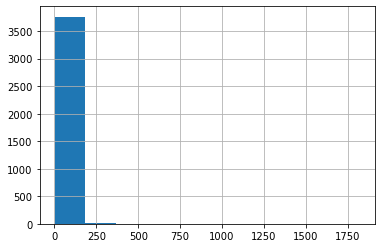

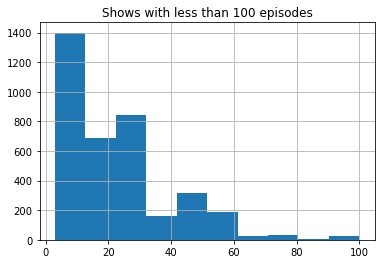

In [14]:
anime[(anime['Type'] == 'TV') & (anime['Episodes'])]['Episodes'].hist()
plt.show()

anime[(anime['Type'] == 'TV') & (anime['Episodes'] <= 100)]['Episodes'].hist()
plt.title('Shows with less than 100 episodes')
plt.show()

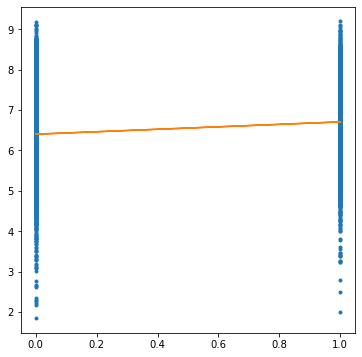

In [15]:
results = smf.ols(formula = 'Score ~ Comedy', data=anime).fit()
results.summary()

fig, ax = plt.subplots(figsize = (6,6))

ax.plot(anime['Comedy'], anime['Score'], '.',linewidth = 1)
# plot(x value, y value, style)

m, b = np.polyfit(anime['Comedy'], anime['Score'], 1)
# polyfit(x value, y value)
plt.plot(anime['Comedy'], m*anime['Comedy'] + b)
# plot(x value, function of x)

plt.show()


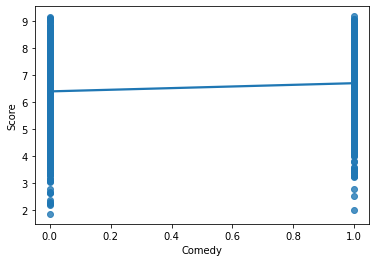

In [16]:
sns.regplot(x='Comedy', y='Score', data=anime, ci=False)
plt.show()

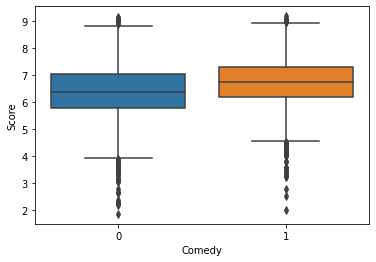

In [17]:
sns.boxplot(x='Comedy', y='Score', data=anime)
plt.show()

In [18]:
anime[(anime['Comedy'] == 0)]['Score'].describe()

count    7847.000000
mean        6.399449
std         0.893778
min         1.850000
25%         5.780000
50%         6.390000
75%         7.030000
max         9.170000
Name: Score, dtype: float64

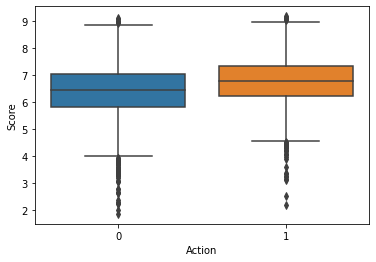

In [19]:
sns.boxplot(x='Action', y='Score', data=anime)
plt.show()

In [20]:
anime[(anime['Action'] == 0)]['Score'].describe()

count    9094.000000
mean        6.424249
std         0.883731
min         1.850000
25%         5.820000
50%         6.440000
75%         7.050000
max         9.110000
Name: Score, dtype: float64

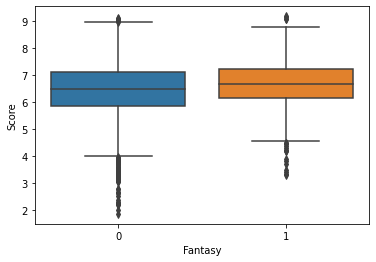

In [21]:
sns.boxplot(x='Fantasy', y='Score', data=anime)
plt.show()

In [22]:
anime[(anime['Fantasy'] == 0)]['Score'].describe()

count    9954.000000
mean        6.471052
std         0.902481
min         1.850000
25%         5.860000
50%         6.480000
75%         7.110000
max         9.110000
Name: Score, dtype: float64

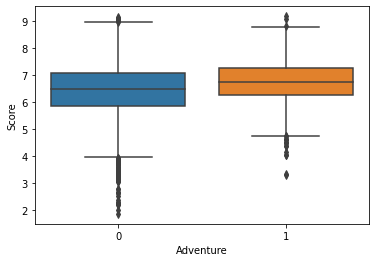

In [23]:
sns.boxplot(x='Adventure', y='Score', data=anime)
plt.show()

In [24]:
anime[(anime['Adventure'] == 0)]['Score'].describe()

count    10118.000000
mean         6.456281
std          0.903460
min          1.850000
25%          5.840000
50%          6.470000
75%          7.100000
max          9.170000
Name: Score, dtype: float64

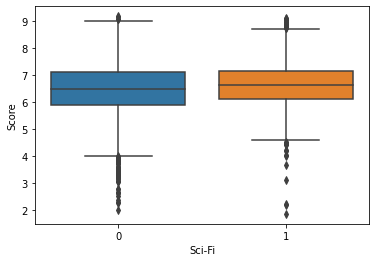

In [25]:
sns.boxplot(x='Sci-Fi', y='Score', data=anime)
plt.show()

In [26]:
anime[(anime['Sci-Fi'] == 0)]['Score'].describe()

count    10221.000000
mean         6.483436
std          0.898316
min          2.010000
25%          5.880000
50%          6.490000
75%          7.130000
max          9.190000
Name: Score, dtype: float64

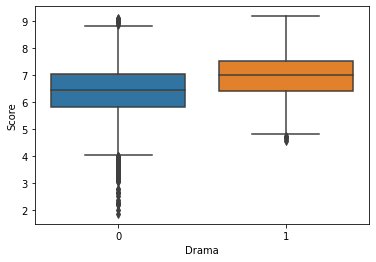

In [27]:
sns.boxplot(x='Drama', y='Score', data=anime)
plt.show()

In [28]:
anime[(anime['Drama'] == 0)]['Score'].describe()

count    10355.000000
mean         6.419186
std          0.871064
min          1.850000
25%          5.830000
50%          6.440000
75%          7.040000
max          9.110000
Name: Score, dtype: float64

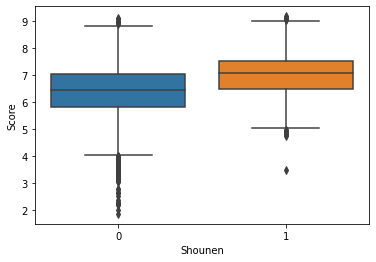

In [29]:
sns.boxplot(x='Shounen', y='Score', data=anime)
plt.show()

In [30]:
anime[(anime['Shounen'] == 0)]['Score'].describe()

count    10519.000000
mean         6.420402
std          0.878175
min          1.850000
25%          5.830000
50%          6.440000
75%          7.040000
max          9.110000
Name: Score, dtype: float64

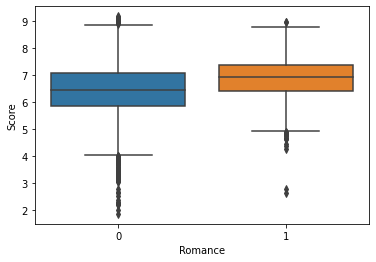

In [31]:
sns.boxplot(x='Romance', y='Score', data=anime)
plt.show()

In [32]:
anime[(anime['Romance'] == 0)]['Score'].describe()

count    10682.000000
mean         6.451319
std          0.889859
min          1.850000
25%          5.850000
50%          6.460000
75%          7.070000
max          9.190000
Name: Score, dtype: float64

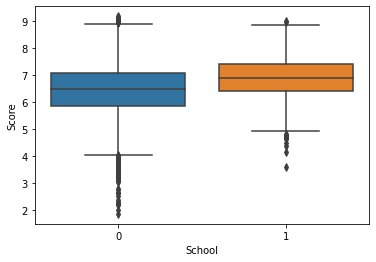

In [33]:
sns.boxplot(x='School', y='Score', data=anime)
plt.show()

In [34]:
anime[(anime['School'] == 0)]['Score'].describe()

count    10973.000000
mean         6.460548
std          0.888556
min          1.850000
25%          5.870000
50%          6.470000
75%          7.090000
max          9.190000
Name: Score, dtype: float64

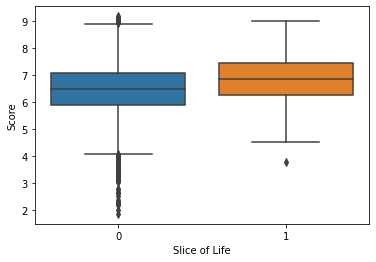

In [35]:
sns.boxplot(x='Slice of Life', y='Score', data=anime)
plt.show()

In [36]:
anime[(anime['Slice of Life'] == 0)]['Score'].describe()

count    11036.000000
mean         6.470772
std          0.882006
min          1.850000
25%          5.890000
50%          6.480000
75%          7.100000
max          9.190000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Correlation matrix')

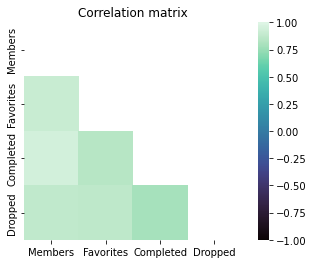

In [37]:
#Check for Multicollinearity Using Spearman Rank Correlations
temp = anime[['Members', 'Favorites', 'Completed', 'Dropped']]
corrs = temp.corr(method = "spearman")
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='mako', mask=mask, square=True, vmin=-1, vmax=1)
plt.title('Correlation matrix')

In [38]:
results = smf.ols(formula = 'Score ~ Members + Favorites + Completed + Dropped', data=anime).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     931.4
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:38:27   Log-Likelihood:                -14475.
No. Observations:               12406   AIC:                         2.896e+04
Df Residuals:                   12401   BIC:                         2.900e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3491      0.008    838.648      0.0

In [39]:
anime['Good'] = (anime['Score'] > 7.0)
info = {'Good': {False: 0, True: 1}}
anime = anime.replace(info)

In [40]:
anime1 = anime.drop(["Good", "index", "MAL_ID", "Name", "Genres", "English name", "Japanese name", "Type", "Aired", "Premiered", "Producers", "Licensors", "Studios", "Source", "Duration", "Rating", "Ranked", "Popularity", "Score-10", "Score-9", "Score-8", "Score-7", "Score-6", "Score-5", "Score-4", "Score-3", "Score-2", "Score-1", "Total Scores"], axis=1)
anime1['Good'] = (anime1['Score'] > 7)
info = {'Good': {False: 0, True: 1}}
anime1 = anime1.replace(info)
anime1.head(1)

,Score,Episodes,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Comedy,Action,Fantasy,Adventure,Sci-Fi,Drama,Shounen,Romance,School,Slice of Life,Good
0,8.78,26.0,1251960,61971,105808,718161,71513,26678,329800,1,1,0,1,1,1,0,0,0,0,1


In [41]:
anime1 = anime1.dropna()
anime1.head(3)

,Score,Episodes,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Comedy,Action,Fantasy,Adventure,Sci-Fi,Drama,Shounen,Romance,School,Slice of Life,Good
0,8.78,26.0,1251960,61971,105808,718161,71513,26678,329800,1,1,0,1,1,1,0,0,0,0,1
1,8.39,1.0,273145,1174,4143,208333,1935,770,57964,0,1,0,0,1,1,0,0,0,0,1
2,8.24,26.0,558913,12944,29113,343492,25465,13925,146918,1,1,0,1,1,1,1,0,0,0,1


In [42]:
x = anime1.iloc[:, 9:19]
y = anime1.iloc[:, 19]
x = sm.add_constant(x)
logit_mod = sm.Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.541529
         Iterations 6


In [43]:
print(logit_mod.summary())

                           Logit Regression Results                           
Dep. Variable:                   Good   No. Observations:                12301
Model:                          Logit   Df Residuals:                    12290
Method:                           MLE   Df Model:                           10
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.1167
Time:                        18:38:27   Log-Likelihood:                -6661.3
converged:                       True   LL-Null:                       -7541.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.9958      0.042    -46.967      0.000      -2.079      -1.913
Comedy            0.4588      0.046     10.012      0.000       0.369       0.549
Action            0.7776      0.050     

In [44]:
np.exp(logit_mod.params)

const            0.135907
Comedy           1.582171
Action           2.176192
Fantasy          1.286218
Adventure        1.287918
Sci-Fi           1.013140
Drama            2.895727
Shounen          2.657621
Romance          1.729915
School           1.886049
Slice of Life    2.297199
dtype: float64

In [45]:
np.exp(logit_mod.conf_int())

,0,1
const,0.125046,0.147710
Comedy,1.446259,1.730855
Action,1.973766,2.399378
Fantasy,1.153749,1.433897
Adventure,1.152262,1.439545
Sci-Fi,0.905494,1.133582
Drama,2.599563,3.225631
Shounen,2.381020,2.966354
Romance,1.539053,1.944446
School,1.661111,2.141446


In [46]:
anime1.Drama.sum()

2047

In [47]:
anime1.Shounen.sum()

1875

In [49]:
anime1.sum()

Score            8.010691e+04
Episodes         1.395150e+05
Members          5.999284e+08
Favorites        7.856672e+06
Watching         3.750089e+07
Completed        3.876876e+08
On-Hold          1.636226e+07
Dropped          2.014070e+07
Plan to Watch    1.382369e+08
Comedy           4.524000e+03
Action           3.297000e+03
Fantasy          2.428000e+03
Adventure        2.273000e+03
Sci-Fi           2.182000e+03
Drama            2.047000e+03
Shounen          1.875000e+03
Romance          1.721000e+03
School           1.425000e+03
Slice of Life    1.357000e+03
Good             3.723000e+03
dtype: float64